In [1]:
import librosa
import os

In [2]:
def getDatafile(file_dir):

	test_list = []
	test_label = [] 
	valide_list = []
	valide_label = []
	train_list = []
	train_label = []


	file_list = []   #liste des files de wav
	dic_list = [] # dictionnaire de base des données
	path_list=os.listdir(file_dir)

	for wav_dir in path_list:
		name = wav_dir.split(sep='.')
		if(len(name) == 1) :
			for wav in os.listdir(file_dir+'/'+wav_dir): 
				name_wav = wav.split(sep='.')
				if(len(name_wav) == 2 and name_wav[1] == 'wav' ):
					file_list.append(wav_dir+'/'+wav)
					if not(wav_dir in dic_list):
						dic_list.append(wav_dir)

	print(len(file_list))
	print(dic_list)

	index = {}
	for i in range(len(dic_list)):
		index[dic_list[i]] = i
	#Creates the reverse table that maps labels names to their index	
		
	print(index)
	f=open("/home/gjx/Desktop/vocale/data_speech_commands_v0.02/testing_list.txt",'r')
	for line in f:
		test_list.append(line.strip('\n'))
		label = line.strip('\n').split(sep='/')[0]
		test_label.append(index[label])


	for line in open("/home/gjx/Desktop/vocale/data_speech_commands_v0.02/validation_list.txt",'r'):
		valide_list.append(line.strip('\n'))
		label = line.strip('\n').split(sep='/')[0]
		valide_label.append(index[label])


	for line in file_list:
		if not (line in test_list ):
			if not (line in valide_list):
				train_list.append(line)
				train_label.append(index[label])

	return index, train_list, train_label, valide_list, valide_label, test_list, test_label


In [3]:
file_dir="/home/gjx/Desktop/vocale/data_speech_commands_v0.02"
index, train_list, train_label, valide_list, valide_label, test_list, test_label=getDatafile(file_dir)

105835
['down', 'learn', 'left', 'forward', 'on', 'marvin', 'one', 'six', 'visual', 'right', 'sheila', 'yes', 'backward', 'eight', 'up', 'bird', 'go', 'wow', 'no', 'bed', 'seven', 'tree', 'cat', 'nine', 'zero', 'four', 'stop', 'follow', '_background_noise_', 'five', 'off', 'dog', 'house', 'two', 'three', 'happy']
{'down': 0, 'learn': 1, 'left': 2, 'forward': 3, 'on': 4, 'marvin': 5, 'one': 6, 'six': 7, 'visual': 8, 'right': 9, 'sheila': 10, 'yes': 11, 'backward': 12, 'eight': 13, 'up': 14, 'bird': 15, 'go': 16, 'wow': 17, 'no': 18, 'bed': 19, 'seven': 20, 'tree': 21, 'cat': 22, 'nine': 23, 'zero': 24, 'four': 25, 'stop': 26, 'follow': 27, '_background_noise_': 28, 'five': 29, 'off': 30, 'dog': 31, 'house': 32, 'two': 33, 'three': 34, 'happy': 35}


In [4]:
# from tqdm import tqdm
# import time
# train_set=[]
# start=time.clock()
# for i in tqdm(range(len(train_list))):
#     y, sr = librosa.load("/home/gjx/Desktop/vocale/data_speech_commands_v0.02/"+train_list[i], sr=None)
#     melspec = librosa.feature.melspectrogram(y, sr, n_fft=1024, hop_length=512, n_mels=128)
#     logmelspec = librosa.power_to_db(melspec)
#     train_set.append(logmelspec)
# end=time.clock()
# print(end-start)
# for i in range(len(train_set)):
#     train_set[i]=train_set[i].reshape(-1)

# import numpy as np
# for i in range(len(train_set)):
#     if train_set[i].size < 4096:
#         t=4096-train_set[i].size
#         a=np.mean(train_set[i])
#         z=np.zeros(t)
#         z.fill(a)
# #         print(tmp.shape)
#         train_set[i]=(np.append(train_set[i],z))
#     elif train_set[i].size > 4096:
#         train_set[i]=train_set[i][:4096]


In [5]:
from tqdm import tqdm
import time
valide_set=[]
start=time.clock()
for i in tqdm(range(len(valide_list))):
    y, sr = librosa.load("/home/gjx/Desktop/vocale/data_speech_commands_v0.02/"+valide_list[i], sr=None)
    melspec = librosa.feature.melspectrogram(y, sr, n_fft=1024, hop_length=512, n_mels=128)
    logmelspec = librosa.power_to_db(melspec)
    valide_set.append(logmelspec)
end=time.clock()
print(end-start)

for i in range(len(valide_set)):
    valide_set[i]=valide_set[i].reshape(-1)

import numpy as np
for i in range(len(valide_set)):
    if valide_set[i].size < 4096:
        t=4096-valide_set[i].size
        a=np.mean(valide_set[i])
        z=np.zeros(t)
        z.fill(a)
#         print(tmp.shape)
        valide_set[i]=(np.append(valide_set[i],z))
    elif valide_set[i].size > 4096:
        valide_set[i]=valide_set[i][:4096]


# pca = PCA(n_components=2000)
# train = pca.fit_transform(valide_set)
# print(pca.explained_variance_ratio_)

100%|██████████| 9981/9981 [03:06<00:00, 53.60it/s]

1322.801362


In [6]:
from tqdm import tqdm
import time
test_set=[]
start=time.clock()
for i in tqdm(range(len(test_list))):
    y, sr = librosa.load("/home/gjx/Desktop/vocale/data_speech_commands_v0.02/"+test_list[i], sr=None)
    melspec = librosa.feature.melspectrogram(y, sr, n_fft=1024, hop_length=512, n_mels=128)
    logmelspec = librosa.power_to_db(melspec)
    test_set.append(logmelspec)
end=time.clock()
print(end-start)


for i in range(len(test_set)):
    test_set[i]=test_set[i].reshape(-1)

import numpy as np
for i in range(len(test_set)):
    if test_set[i].size < 4096:
        t=4096-test_set[i].size
        a=np.mean(test_set[i])
        z=np.zeros(t)
        z.fill(a)
#         print(tmp.shape)
        test_set[i]=(np.append(test_set[i],z))
    elif test_set[i].size > 4096:
        test_set[i]=test_set[i][:4096]

# test = pca.fit_transform(test_set)



100%|██████████| 11005/11005 [02:45<00:00, 66.47it/s]


1201.566248


In [7]:
valide_set.extend(test_set)

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=400)
data = pca.fit_transform(valide_set)

In [9]:
train = data[:9981]

test = data[9981:]

In [10]:
# -*- coding: utf-8 -*-
import torch
x = torch.Tensor(train)
y = torch.Tensor(valide_label)

In [11]:
x_test = torch.Tensor(test)
y_test = torch.Tensor(test_label)

In [14]:
import sklearn
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import torch.optim
x = Variable(x)
y = Variable(y)
 
class Net(nn.Module):
    def __init__(self,n_feature,n_hidden1,n_hidden2,n_hidden3,n_hidden4, n_hidden5,n_out):
        super(Net,self).__init__()
        self.hidden1 = nn.Linear(n_feature,n_hidden1)
        self.hidden2 = nn.Linear(n_hidden1,n_hidden2)
        self.hidden3 = nn.Linear(n_hidden2,n_hidden3)
        self.hidden4 = nn.Linear(n_hidden3,n_hidden4)
        self.hidden5 = nn.Linear(n_hidden4,n_hidden5)
        self.out = nn.Linear(n_hidden5,n_out)

    def forward(self, x):
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        x = F.relu(self.hidden3(x))
        x = F.relu(self.hidden4(x))
        x = F.relu(self.hidden5(x))
        x = self.out(x)
        out = F.log_softmax(x,dim=1)
        return out
 
 
net = Net(n_feature=400,n_hidden1=1500,n_hidden2=1000, n_hidden3=500, n_hidden4=200,n_hidden5=100,n_out=36)



In [15]:
optimizer = torch.optim.SGD(net.parameters(),lr=0.01)
 
epochs = 10000
 
px = []
py = []
t1 = []
t2 = []
for i in range(epochs):
    predict = net(x)
#     print(predict)
    loss = F.nll_loss(predict,y.long())  # 输出层 用了log_softmax 则需要用这个误差函数
    lambda1 = torch.tensor(0.01)
    l2_reg = torch.tensor(0.)
    for param in net.parameters():
        l2_reg += torch.norm(param)
    loss += lambda1 * l2_reg
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(i,"loss:",loss.data[0])
    px.append(i)
    py.append(loss.data[0])
    output = net(x)
    pred = output.data.max(1, keepdim=True)[1]
    s = 0
    for i in range(9981):
        if float(pred[i].item()) == y[i].item():
            s+=1
    t1.append(s/9981)
    print("train :",s/9981)
    output1 = net(x_test)
    pred1 = output1.data.max(1, keepdim=True)[1]
    s = 0
    for i in range(len(test)):
        if float(pred1[i].item()) == y_test[i].item():
            s+=1
    t2.append(s/11005)
    print("test :",s/11005)


/home/gjx/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
/home/gjx/.local/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


0 loss: tensor(4.4346)
train : 0.027752730187355978
test : 0.029622898682417083
1 loss: tensor(4.3876)
train : 0.034365294058711554
test : 0.03434802362562472
2 loss: tensor(4.3606)
train : 0.038272718164512574
test : 0.03861880963198546
3 loss: tensor(4.3426)
train : 0.041078048291754335
test : 0.04079963652885052
4 loss: tensor(4.3292)
train : 0.042180142270313595
test : 0.04352567014993185
5 loss: tensor(4.3187)
train : 0.04288147480212404
test : 0.046160835983643796
6 loss: tensor(4.3098)
train : 0.04528604348261697
test : 0.04797819173103135
7 loss: tensor(4.3020)
train : 0.04819156397154594
test : 0.04779645615629259
8 loss: tensor(4.2950)
train : 0.05159803626891093
test : 0.0497955474784189
9 loss: tensor(4.2885)
train : 0.053702033864342254
test : 0.05170377101317583
10 loss: tensor(4.2824)
train : 0.0545035567578399
test : 0.053430258973194006
11 loss: tensor(4.2767)
train : 0.056607554353271215
test : 0.05370286233530214
12 loss: tensor(4.2713)
train : 0.05841098086364092
te

train : 0.2648031259392846
test : 0.22317128577919126
105 loss: tensor(3.6016)
train : 0.2680092175132752
test : 0.225988187187642
106 loss: tensor(3.5912)
train : 0.2712153090872658
test : 0.22844161744661517
107 loss: tensor(3.5807)
train : 0.2750225428313796
test : 0.23053157655611087
108 loss: tensor(3.5702)
train : 0.2775273018735598
test : 0.23307587460245344
109 loss: tensor(3.5597)
train : 0.28013225127742714
test : 0.2351658337119491
110 loss: tensor(3.5492)
train : 0.28293758140466885
test : 0.23680145388459792
111 loss: tensor(3.5387)
train : 0.28604348261697227
test : 0.23743752839618354
112 loss: tensor(3.5282)
train : 0.2882476705740908
test : 0.24161744661517492
113 loss: tensor(3.5180)
train : 0.28784690912734195
test : 0.23961835529304862
114 loss: tensor(3.5088)
train : 0.28804728985071637
test : 0.24361653793730123
115 loss: tensor(3.5030)
train : 0.2733193066826971
test : 0.22644252612448887
116 loss: tensor(3.5086)
train : 0.23504658851818455
test : 0.2100863243980

train : 0.41959723474601746
test : 0.3355747387551113
209 loss: tensor(2.8841)
train : 0.40446849013124936
test : 0.3145842798727851
210 loss: tensor(2.9074)
train : 0.4142871455765955
test : 0.3306678782371649
211 loss: tensor(2.8952)
train : 0.4083759142370504
test : 0.31385733757383005
212 loss: tensor(2.8973)
train : 0.4206993287245767
test : 0.3323034984098137
213 loss: tensor(2.8780)
train : 0.4175934275122733
test : 0.32085415720127214
214 loss: tensor(2.8736)
train : 0.41458771666165717
test : 0.3283961835529305
215 loss: tensor(2.8811)
train : 0.40416791904618776
test : 0.3144025442980463
216 loss: tensor(2.8991)
train : 0.37110509968940986
test : 0.2964107223989096
217 loss: tensor(2.9845)
train : 0.3631900611161206
test : 0.2876874148114493
218 loss: tensor(3.0167)
train : 0.35337140567077446
test : 0.2745115856428896
219 loss: tensor(3.0385)
train : 0.37601442741208296
test : 0.3064970467969105
220 loss: tensor(2.9728)
train : 0.42490732391543934
test : 0.32757837346660607


test : 0.40917764652430716
313 loss: tensor(2.3975)
train : 0.5289049193467589
test : 0.3983643798273512
314 loss: tensor(2.4082)
train : 0.5096683699028154
test : 0.39154929577464787
315 loss: tensor(2.4462)
train : 0.4950405770964833
test : 0.3749204906860518
316 loss: tensor(2.5145)
train : 0.5107704638813746
test : 0.38691503861880966
317 loss: tensor(2.4626)
train : 0.5223925458370905
test : 0.39945479327578376
318 loss: tensor(2.4377)
train : 0.5469391844504559
test : 0.41090413448432533
319 loss: tensor(2.3773)
train : 0.559663360384731
test : 0.4228078146297138
320 loss: tensor(2.3358)
train : 0.569882777276826
test : 0.421172194457065
321 loss: tensor(2.3207)
train : 0.5648732591924657
test : 0.4253521126760563
322 loss: tensor(2.3197)
train : 0.5600641218314798
test : 0.41890049977283056
323 loss: tensor(2.3308)
train : 0.5531509868750626
test : 0.41490231712857795
324 loss: tensor(2.3576)
train : 0.5355174832181144
test : 0.4093593820990459
325 loss: tensor(2.3779)
train : 0

test : 0.44579736483416627
418 loss: tensor(2.2037)
train : 0.6514377316902114
test : 0.45288505224897774
419 loss: tensor(2.0645)
train : 0.6681695220919748
test : 0.4981372103589278
420 loss: tensor(1.9944)
train : 0.6787897004308185
test : 0.4788732394366197
421 loss: tensor(1.9800)
train : 0.6767858931970745
test : 0.497955474784189
422 loss: tensor(1.9649)
train : 0.6730788498146478
test : 0.47878237164925036
423 loss: tensor(1.9771)
train : 0.6646628594329226
test : 0.49086778736937753
424 loss: tensor(1.9785)
train : 0.6525398256687707
test : 0.46542480690595184
425 loss: tensor(2.0145)
train : 0.6394148882877467
test : 0.47669241253975464
426 loss: tensor(2.0262)
train : 0.6242861436729786
test : 0.44870513402998635
427 loss: tensor(2.0780)
train : 0.6200781484821161
test : 0.4655156746933212
428 loss: tensor(2.0667)
train : 0.6177737701633103
test : 0.4447978191731031
429 loss: tensor(2.0932)
train : 0.6325017533313295
test : 0.46742389822807817
430 loss: tensor(2.0395)
train 

test : 0.49050431621990004
523 loss: tensor(1.7997)
train : 0.6630598136459273
test : 0.4606996819627442
524 loss: tensor(1.8824)
train : 0.5841098086364092
test : 0.42353475692866877
525 loss: tensor(2.1396)
train : 0.6095581605049594
test : 0.4198091776465243
526 loss: tensor(2.0740)
train : 0.5932271315499449
test : 0.4269877328487051
527 loss: tensor(2.1171)
train : 0.6572487726680694
test : 0.461608359836438
528 loss: tensor(1.9252)
train : 0.6894098787696623
test : 0.4870513402998637
529 loss: tensor(1.8546)
train : 0.7021340547039375
test : 0.4953203089504771
530 loss: tensor(1.7971)
train : 0.7153591824466486
test : 0.5030440708768742
531 loss: tensor(1.7854)
train : 0.7049393848311792
test : 0.4995002271694684
532 loss: tensor(1.7906)
train : 0.7101492836389139
test : 0.49713766469786463
533 loss: tensor(1.7876)
train : 0.6891093076846008
test : 0.4907769195820082
534 loss: tensor(1.8286)
train : 0.6940186354072738
test : 0.4877782825988187
535 loss: tensor(1.8186)
train : 0.6

628 loss: tensor(1.5331)
train : 0.7989179440937781
test : 0.5300318037255792
629 loss: tensor(1.5368)
train : 0.788598336839996
test : 0.5358473421172194
630 loss: tensor(1.5468)
train : 0.7895000500951809
test : 0.5228532485233984
631 loss: tensor(1.5580)
train : 0.7766756837992185
test : 0.5310313493866424
632 loss: tensor(1.5763)
train : 0.7735697825869151
test : 0.5154020899591095
633 loss: tensor(1.5929)
train : 0.7589419897805831
test : 0.5255792821444798
634 loss: tensor(1.6082)
train : 0.7628494138863842
test : 0.5060427078600636
635 loss: tensor(1.6198)
train : 0.7576395150786495
test : 0.5237619263970922
636 loss: tensor(1.6147)
train : 0.7660555054603747
test : 0.5084052703316674
637 loss: tensor(1.6124)
train : 0.7666566476304979
test : 0.5267605633802817
638 loss: tensor(1.5926)
train : 0.7668570283538724
test : 0.515765561108587
639 loss: tensor(1.5939)
train : 0.7584410379721471
test : 0.5250340754202635
640 loss: tensor(1.5986)
train : 0.7521290451858531
test : 0.50913

train : 0.8325819056206792
test : 0.5422989550204452
734 loss: tensor(1.3869)
train : 0.8331830477908025
test : 0.5387551113130395
735 loss: tensor(1.3916)
train : 0.8131449754533614
test : 0.5340299863698319
736 loss: tensor(1.4253)
train : 0.8111411682196172
test : 0.5272149023171285
737 loss: tensor(1.4360)
train : 0.7910029055204889
test : 0.5238527941844616
738 loss: tensor(1.4767)
train : 0.7906021440737401
test : 0.5155838255338483
739 loss: tensor(1.4830)
train : 0.778378919947901
test : 0.5197637437528396
740 loss: tensor(1.5071)
train : 0.7864943392445647
test : 0.5154929577464789
741 loss: tensor(1.4920)
train : 0.7920048091373609
test : 0.5244888686960473
742 loss: tensor(1.4798)
train : 0.8067327923053802
test : 0.5259427532939573
743 loss: tensor(1.4432)
train : 0.8199579200480914
test : 0.5373012267151295
744 loss: tensor(1.4102)
train : 0.8331830477908025
test : 0.5410268059972739
745 loss: tensor(1.3780)
train : 0.84510570083158
test : 0.5520218082689686
746 loss: tens

test : 0.571830985915493
839 loss: tensor(1.2098)
train : 0.894800120228434
test : 0.5661063153112221
840 loss: tensor(1.2056)
train : 0.8905921250375713
test : 0.5676510676965016
841 loss: tensor(1.2149)
train : 0.890391744314197
test : 0.562925942753294
842 loss: tensor(1.2128)
train : 0.883578799719467
test : 0.565106769650159
843 loss: tensor(1.2277)
train : 0.8811742310389741
test : 0.5568378009995456
844 loss: tensor(1.2261)
train : 0.8756637611461777
test : 0.5596547024079964
845 loss: tensor(1.2458)
train : 0.8725578599338744
test : 0.5495683780099955
846 loss: tensor(1.2440)
train : 0.8647430117222723
test : 0.5552021808268969
847 loss: tensor(1.2661)
train : 0.8643422502755235
test : 0.5447523852794185
848 loss: tensor(1.2617)
train : 0.8590321611061016
test : 0.5518400726942299
849 loss: tensor(1.2778)
train : 0.8618374912333433
test : 0.5414811449341208
850 loss: tensor(1.2698)
train : 0.8617373008716561
test : 0.5502953203089505
851 loss: tensor(1.2723)
train : 0.864542630

train : 0.9347760745416291
test : 0.5843707405724671
945 loss: tensor(1.0822)
train : 0.932271315499449
test : 0.5777373920945025
946 loss: tensor(1.0873)
train : 0.9271616070534014
test : 0.57664697864607
947 loss: tensor(1.0989)
train : 0.9179440937781785
test : 0.5689232167196728
948 loss: tensor(1.1123)
train : 0.9052199178439034
test : 0.5657428441617447
949 loss: tensor(1.1429)
train : 0.887486223825268
test : 0.5517492049068605
950 loss: tensor(1.1813)
train : 0.845606652640016
test : 0.5378464334393458
951 loss: tensor(1.2784)
train : 0.7903015729886785
test : 0.4918673330304407
952 loss: tensor(1.4357)
train : 0.6661657148582306
test : 0.4391640163562017
953 loss: tensor(1.8985)
train : 0.587917042380523
test : 0.3755565651976374
954 loss: tensor(2.4654)
train : 0.6532411582005812
test : 0.42289868241708317
955 loss: tensor(2.1195)
train : 0.8171525899208496
test : 0.5221263062244434
956 loss: tensor(1.4054)
train : 0.8769662358481114
test : 0.5473875511131304
957 loss: tensor

train : 0.9643322312393547
test : 0.5868241708314402
1050 loss: tensor(0.9981)
train : 0.9642320408776676
test : 0.5880963198546115
1051 loss: tensor(0.9969)
train : 0.9641318505159804
test : 0.5867333030440709
1052 loss: tensor(0.9959)
train : 0.9646328023244164
test : 0.5880054520672422
1053 loss: tensor(0.9950)
train : 0.9646328023244164
test : 0.5861880963198546
1054 loss: tensor(0.9942)
train : 0.9640316601542932
test : 0.5884597910040891
1055 loss: tensor(0.9936)
train : 0.9642320408776676
test : 0.5861880963198546
1056 loss: tensor(0.9933)
train : 0.9639314697926059
test : 0.5880054520672422
1057 loss: tensor(0.9931)
train : 0.9640316601542932
test : 0.5847342117219446
1058 loss: tensor(0.9935)
train : 0.962528804728985
test : 0.587005906406179
1059 loss: tensor(0.9941)
train : 0.962528804728985
test : 0.5835529304861427
1060 loss: tensor(0.9958)
train : 0.9602244264101794
test : 0.5854611540208996
1061 loss: tensor(0.9980)
train : 0.958120428814748
test : 0.5794638800545207
106

train : 0.9766556457268811
test : 0.5922762380736029
1154 loss: tensor(0.9412)
train : 0.9769562168119427
test : 0.5920036347114948
1155 loss: tensor(0.9402)
train : 0.9767558360885683
test : 0.5929123125851885
1156 loss: tensor(0.9392)
train : 0.9770564071736298
test : 0.5925488414357111
1157 loss: tensor(0.9382)
train : 0.9771565975353171
test : 0.5925488414357111
1158 loss: tensor(0.9373)
train : 0.9774571686203787
test : 0.5923671058609723
1159 loss: tensor(0.9365)
train : 0.9777577397054403
test : 0.5928214447978192
1160 loss: tensor(0.9356)
train : 0.9777577397054403
test : 0.5928214447978192
1161 loss: tensor(0.9348)
train : 0.9779581204288148
test : 0.5927305770104498
1162 loss: tensor(0.9340)
train : 0.9778579300671275
test : 0.5929123125851885
1163 loss: tensor(0.9333)
train : 0.9783588818755635
test : 0.593003180372558
1164 loss: tensor(0.9325)
train : 0.978559262598938
test : 0.5925488414357111
1165 loss: tensor(0.9318)
train : 0.9787596433223124
test : 0.5926397092230804
1

test : 0.5924579736483416
1258 loss: tensor(0.8953)
train : 0.9854723975553552
test : 0.5921853702862335
1259 loss: tensor(0.8948)
train : 0.9855725879170424
test : 0.5921853702862335
1260 loss: tensor(0.8943)
train : 0.9855725879170424
test : 0.5922762380736029
1261 loss: tensor(0.8939)
train : 0.9856727782787296
test : 0.591821899136756
1262 loss: tensor(0.8934)
train : 0.985873159002104
test : 0.5922762380736029
1263 loss: tensor(0.8929)
train : 0.985873159002104
test : 0.5919127669241254
1264 loss: tensor(0.8924)
train : 0.985873159002104
test : 0.5920945024988642
1265 loss: tensor(0.8920)
train : 0.9859733493637912
test : 0.5917310313493866
1266 loss: tensor(0.8915)
train : 0.9859733493637912
test : 0.5920945024988642
1267 loss: tensor(0.8911)
train : 0.9862739204488529
test : 0.5916401635620173
1268 loss: tensor(0.8906)
train : 0.9861737300871656
test : 0.5921853702862335
1269 loss: tensor(0.8902)
train : 0.9862739204488529
test : 0.5920036347114948
1270 loss: tensor(0.8897)
trai

test : 0.5926397092230804
1362 loss: tensor(0.8591)
train : 0.9904819156397154
test : 0.5925488414357111
1363 loss: tensor(0.8588)
train : 0.9910830578098387
test : 0.5928214447978192
1364 loss: tensor(0.8585)
train : 0.9905821060014026
test : 0.5928214447978192
1365 loss: tensor(0.8583)
train : 0.9912834385332131
test : 0.5928214447978192
1366 loss: tensor(0.8580)
train : 0.9904819156397154
test : 0.593003180372558
1367 loss: tensor(0.8577)
train : 0.9911832481715259
test : 0.5926397092230804
1368 loss: tensor(0.8574)
train : 0.9905821060014026
test : 0.5928214447978192
1369 loss: tensor(0.8572)
train : 0.9913836288949003
test : 0.5925488414357111
1370 loss: tensor(0.8569)
train : 0.9906822963630899
test : 0.5926397092230804
1371 loss: tensor(0.8567)
train : 0.9913836288949003
test : 0.5925488414357111
1372 loss: tensor(0.8564)
train : 0.9907824867247771
test : 0.5926397092230804
1373 loss: tensor(0.8561)
train : 0.9913836288949003
test : 0.5927305770104498
1374 loss: tensor(0.8559)
t

test : 0.5928214447978192
1466 loss: tensor(0.8350)
train : 0.9939885782987676
test : 0.5922762380736029
1467 loss: tensor(0.8348)
train : 0.9939885782987676
test : 0.5926397092230804
1468 loss: tensor(0.8347)
train : 0.9939885782987676
test : 0.5922762380736029
1469 loss: tensor(0.8345)
train : 0.9941889590221421
test : 0.5927305770104498
1470 loss: tensor(0.8343)
train : 0.9939885782987676
test : 0.5922762380736029
1471 loss: tensor(0.8341)
train : 0.9942891493838293
test : 0.5926397092230804
1472 loss: tensor(0.8339)
train : 0.9940887686604548
test : 0.5924579736483416
1473 loss: tensor(0.8337)
train : 0.9942891493838293
test : 0.5927305770104498
1474 loss: tensor(0.8335)
train : 0.9941889590221421
test : 0.5924579736483416
1475 loss: tensor(0.8334)
train : 0.9942891493838293
test : 0.5925488414357111
1476 loss: tensor(0.8332)
train : 0.9942891493838293
test : 0.5925488414357111
1477 loss: tensor(0.8330)
train : 0.9943893397455165
test : 0.5925488414357111
1478 loss: tensor(0.8328)


1570 loss: tensor(0.8180)
train : 0.996593527702635
test : 0.5929123125851885
1571 loss: tensor(0.8179)
train : 0.9964933373409478
test : 0.5925488414357111
1572 loss: tensor(0.8177)
train : 0.996593527702635
test : 0.5929123125851885
1573 loss: tensor(0.8176)
train : 0.9964933373409478
test : 0.5923671058609723
1574 loss: tensor(0.8174)
train : 0.996593527702635
test : 0.5929123125851885
1575 loss: tensor(0.8173)
train : 0.9964933373409478
test : 0.5922762380736029
1576 loss: tensor(0.8172)
train : 0.996593527702635
test : 0.5927305770104498
1577 loss: tensor(0.8170)
train : 0.9964933373409478
test : 0.5922762380736029
1578 loss: tensor(0.8169)
train : 0.996593527702635
test : 0.5926397092230804
1579 loss: tensor(0.8168)
train : 0.9964933373409478
test : 0.5921853702862335
1580 loss: tensor(0.8166)
train : 0.996593527702635
test : 0.5926397092230804
1581 loss: tensor(0.8165)
train : 0.9964933373409478
test : 0.5919127669241254
1582 loss: tensor(0.8164)
train : 0.996593527702635
test :

train : 0.997595431319507
test : 0.5920036347114948
1675 loss: tensor(0.8054)
train : 0.997595431319507
test : 0.5924579736483416
1676 loss: tensor(0.8053)
train : 0.997595431319507
test : 0.5919127669241254
1677 loss: tensor(0.8052)
train : 0.997595431319507
test : 0.5925488414357111
1678 loss: tensor(0.8051)
train : 0.9976956216811943
test : 0.5916401635620173
1679 loss: tensor(0.8050)
train : 0.997595431319507
test : 0.5925488414357111
1680 loss: tensor(0.8049)
train : 0.9976956216811943
test : 0.5917310313493866
1681 loss: tensor(0.8048)
train : 0.997595431319507
test : 0.5923671058609723
1682 loss: tensor(0.8047)
train : 0.9976956216811943
test : 0.591821899136756
1683 loss: tensor(0.8046)
train : 0.9977958120428815
test : 0.5924579736483416
1684 loss: tensor(0.8045)
train : 0.9976956216811943
test : 0.5920036347114948
1685 loss: tensor(0.8044)
train : 0.9978960024045687
test : 0.5922762380736029
1686 loss: tensor(0.8043)
train : 0.9976956216811943
test : 0.5920945024988642
1687 l

test : 0.5921853702862335
1779 loss: tensor(0.7961)
train : 0.9985973349363791
test : 0.5917310313493866
1780 loss: tensor(0.7960)
train : 0.9985973349363791
test : 0.5924579736483416
1781 loss: tensor(0.7959)
train : 0.9985973349363791
test : 0.5915492957746479
1782 loss: tensor(0.7959)
train : 0.9985973349363791
test : 0.5922762380736029
1783 loss: tensor(0.7958)
train : 0.9985973349363791
test : 0.5916401635620173
1784 loss: tensor(0.7957)
train : 0.9985973349363791
test : 0.5921853702862335
1785 loss: tensor(0.7956)
train : 0.9985973349363791
test : 0.591821899136756
1786 loss: tensor(0.7956)
train : 0.9986975252980663
test : 0.5922762380736029
1787 loss: tensor(0.7955)
train : 0.9985973349363791
test : 0.5919127669241254
1788 loss: tensor(0.7954)
train : 0.9986975252980663
test : 0.5922762380736029
1789 loss: tensor(0.7953)
train : 0.9985973349363791
test : 0.5919127669241254
1790 loss: tensor(0.7952)
train : 0.9986975252980663
test : 0.5923671058609723
1791 loss: tensor(0.7952)
t

1883 loss: tensor(0.7888)
train : 0.9990982867448152
test : 0.5915492957746479
1884 loss: tensor(0.7888)
train : 0.9990982867448152
test : 0.5912766924125398
1885 loss: tensor(0.7887)
train : 0.9990982867448152
test : 0.5915492957746479
1886 loss: tensor(0.7886)
train : 0.9990982867448152
test : 0.5913675601999091
1887 loss: tensor(0.7886)
train : 0.9990982867448152
test : 0.5914584279872785
1888 loss: tensor(0.7885)
train : 0.9990982867448152
test : 0.5914584279872785
1889 loss: tensor(0.7885)
train : 0.9990982867448152
test : 0.5914584279872785
1890 loss: tensor(0.7884)
train : 0.9990982867448152
test : 0.5914584279872785
1891 loss: tensor(0.7883)
train : 0.9990982867448152
test : 0.5916401635620173
1892 loss: tensor(0.7883)
train : 0.9990982867448152
test : 0.5913675601999091
1893 loss: tensor(0.7882)
train : 0.9990982867448152
test : 0.5914584279872785
1894 loss: tensor(0.7882)
train : 0.9990982867448152
test : 0.5912766924125398
1895 loss: tensor(0.7881)
train : 0.9990982867448152

1987 loss: tensor(0.7830)
train : 0.9993988578298768
test : 0.5908223534756929
1988 loss: tensor(0.7830)
train : 0.999499048191564
test : 0.5910040890504317
1989 loss: tensor(0.7829)
train : 0.9993988578298768
test : 0.5907314856883235
1990 loss: tensor(0.7829)
train : 0.999499048191564
test : 0.5910040890504317
1991 loss: tensor(0.7828)
train : 0.9993988578298768
test : 0.5908223534756929
1992 loss: tensor(0.7828)
train : 0.999499048191564
test : 0.5910040890504317
1993 loss: tensor(0.7827)
train : 0.9993988578298768
test : 0.5908223534756929
1994 loss: tensor(0.7827)
train : 0.999499048191564
test : 0.5910040890504317
1995 loss: tensor(0.7826)
train : 0.999499048191564
test : 0.5907314856883235
1996 loss: tensor(0.7826)
train : 0.999499048191564
test : 0.5909132212630622
1997 loss: tensor(0.7825)
train : 0.999499048191564
test : 0.5907314856883235
1998 loss: tensor(0.7825)
train : 0.999499048191564
test : 0.5909132212630622
1999 loss: tensor(0.7824)
train : 0.999499048191564
test : 0

2092 loss: tensor(0.7783)
train : 0.9996994289149383
test : 0.5907314856883235
2093 loss: tensor(0.7782)
train : 0.9995992385532512
test : 0.590368014538846
2094 loss: tensor(0.7782)
train : 0.9996994289149383
test : 0.5907314856883235
2095 loss: tensor(0.7782)
train : 0.9996994289149383
test : 0.5902771467514766
2096 loss: tensor(0.7781)
train : 0.9996994289149383
test : 0.5909132212630622
2097 loss: tensor(0.7781)
train : 0.9996994289149383
test : 0.5902771467514766
2098 loss: tensor(0.7780)
train : 0.9996994289149383
test : 0.5908223534756929
2099 loss: tensor(0.7780)
train : 0.9996994289149383
test : 0.5901862789641072
2100 loss: tensor(0.7780)
train : 0.9996994289149383
test : 0.5910040890504317
2101 loss: tensor(0.7779)
train : 0.9996994289149383
test : 0.5900954111767378
2102 loss: tensor(0.7779)
train : 0.9996994289149383
test : 0.5911858246251703
2103 loss: tensor(0.7778)
train : 0.9996994289149383
test : 0.5900954111767378
2104 loss: tensor(0.7778)
train : 0.9996994289149383


2196 loss: tensor(0.7744)
train : 0.9997996192766256
test : 0.5904588823262154
2197 loss: tensor(0.7743)
train : 0.9996994289149383
test : 0.5902771467514766
2198 loss: tensor(0.7743)
train : 0.9997996192766256
test : 0.5905497501135847
2199 loss: tensor(0.7743)
train : 0.9996994289149383
test : 0.590368014538846
2200 loss: tensor(0.7742)
train : 0.9997996192766256
test : 0.5906406179009541
2201 loss: tensor(0.7742)
train : 0.9996994289149383
test : 0.590368014538846
2202 loss: tensor(0.7742)
train : 0.9997996192766256
test : 0.5906406179009541
2203 loss: tensor(0.7741)
train : 0.9997996192766256
test : 0.5902771467514766
2204 loss: tensor(0.7741)
train : 0.9997996192766256
test : 0.5905497501135847
2205 loss: tensor(0.7741)
train : 0.9997996192766256
test : 0.590368014538846
2206 loss: tensor(0.7740)
train : 0.9997996192766256
test : 0.5902771467514766
2207 loss: tensor(0.7740)
train : 0.9997996192766256
test : 0.590368014538846
2208 loss: tensor(0.7740)
train : 0.9997996192766256
tes

2300 loss: tensor(0.7711)
train : 0.9998998096383128
test : 0.5906406179009541
2301 loss: tensor(0.7710)
train : 0.9998998096383128
test : 0.5908223534756929
2302 loss: tensor(0.7710)
train : 0.9998998096383128
test : 0.5905497501135847
2303 loss: tensor(0.7710)
train : 0.9998998096383128
test : 0.5908223534756929
2304 loss: tensor(0.7710)
train : 0.9998998096383128
test : 0.5905497501135847
2305 loss: tensor(0.7709)
train : 0.9998998096383128
test : 0.5908223534756929
2306 loss: tensor(0.7709)
train : 0.9998998096383128
test : 0.5905497501135847
2307 loss: tensor(0.7709)
train : 0.9998998096383128
test : 0.5908223534756929
2308 loss: tensor(0.7708)
train : 0.9998998096383128
test : 0.5905497501135847
2309 loss: tensor(0.7708)
train : 0.9998998096383128
test : 0.5909132212630622
2310 loss: tensor(0.7708)
train : 0.9998998096383128
test : 0.5905497501135847
2311 loss: tensor(0.7707)
train : 0.9998998096383128
test : 0.5909132212630622
2312 loss: tensor(0.7707)
train : 0.9998998096383128

train : 1.0
test : 0.5908223534756929
2416 loss: tensor(0.7679)
train : 1.0
test : 0.5909132212630622
2417 loss: tensor(0.7679)
train : 1.0
test : 0.5907314856883235
2418 loss: tensor(0.7679)
train : 1.0
test : 0.5909132212630622
2419 loss: tensor(0.7678)
train : 1.0
test : 0.5907314856883235
2420 loss: tensor(0.7678)
train : 1.0
test : 0.5909132212630622
2421 loss: tensor(0.7678)
train : 1.0
test : 0.5908223534756929
2422 loss: tensor(0.7677)
train : 1.0
test : 0.5909132212630622
2423 loss: tensor(0.7677)
train : 1.0
test : 0.5908223534756929
2424 loss: tensor(0.7677)
train : 1.0
test : 0.5909132212630622
2425 loss: tensor(0.7677)
train : 1.0
test : 0.5908223534756929
2426 loss: tensor(0.7676)
train : 1.0
test : 0.5910040890504317
2427 loss: tensor(0.7676)
train : 1.0
test : 0.5908223534756929
2428 loss: tensor(0.7676)
train : 1.0
test : 0.5910040890504317
2429 loss: tensor(0.7676)
train : 1.0
test : 0.5908223534756929
2430 loss: tensor(0.7675)
train : 1.0
test : 0.5908223534756929
24

test : 0.5900954111767378
2544 loss: tensor(0.7649)
train : 1.0
test : 0.5907314856883235
2545 loss: tensor(0.7649)
train : 1.0
test : 0.5904588823262154
2546 loss: tensor(0.7648)
train : 1.0
test : 0.5906406179009541
2547 loss: tensor(0.7648)
train : 1.0
test : 0.5902771467514766
2548 loss: tensor(0.7648)
train : 1.0
test : 0.5904588823262154
2549 loss: tensor(0.7648)
train : 1.0
test : 0.590368014538846
2550 loss: tensor(0.7648)
train : 1.0
test : 0.590368014538846
2551 loss: tensor(0.7647)
train : 1.0
test : 0.590368014538846
2552 loss: tensor(0.7647)
train : 1.0
test : 0.5902771467514766
2553 loss: tensor(0.7647)
train : 1.0
test : 0.5904588823262154
2554 loss: tensor(0.7647)
train : 1.0
test : 0.590368014538846
2555 loss: tensor(0.7646)
train : 1.0
test : 0.5904588823262154
2556 loss: tensor(0.7646)
train : 1.0
test : 0.5904588823262154
2557 loss: tensor(0.7646)
train : 1.0
test : 0.5904588823262154
2558 loss: tensor(0.7646)
train : 1.0
test : 0.590368014538846
2559 loss: tensor(0

train : 1.0
test : 0.5910040890504317
2673 loss: tensor(0.7622)
train : 1.0
test : 0.5910040890504317
2674 loss: tensor(0.7622)
train : 1.0
test : 0.5909132212630622
2675 loss: tensor(0.7622)
train : 1.0
test : 0.5910040890504317
2676 loss: tensor(0.7622)
train : 1.0
test : 0.5910040890504317
2677 loss: tensor(0.7621)
train : 1.0
test : 0.5909132212630622
2678 loss: tensor(0.7621)
train : 1.0
test : 0.591094956837801
2679 loss: tensor(0.7621)
train : 1.0
test : 0.5908223534756929
2680 loss: tensor(0.7621)
train : 1.0
test : 0.5910040890504317
2681 loss: tensor(0.7621)
train : 1.0
test : 0.5908223534756929
2682 loss: tensor(0.7620)
train : 1.0
test : 0.5909132212630622
2683 loss: tensor(0.7620)
train : 1.0
test : 0.5908223534756929
2684 loss: tensor(0.7620)
train : 1.0
test : 0.5909132212630622
2685 loss: tensor(0.7620)
train : 1.0
test : 0.5910040890504317
2686 loss: tensor(0.7620)
train : 1.0
test : 0.5909132212630622
2687 loss: tensor(0.7619)
train : 1.0
test : 0.5910040890504317
268

test : 0.5909132212630622
2801 loss: tensor(0.7598)
train : 1.0
test : 0.5907314856883235
2802 loss: tensor(0.7598)
train : 1.0
test : 0.5909132212630622
2803 loss: tensor(0.7598)
train : 1.0
test : 0.5907314856883235
2804 loss: tensor(0.7598)
train : 1.0
test : 0.5908223534756929
2805 loss: tensor(0.7598)
train : 1.0
test : 0.5907314856883235
2806 loss: tensor(0.7597)
train : 1.0
test : 0.5908223534756929
2807 loss: tensor(0.7597)
train : 1.0
test : 0.5907314856883235
2808 loss: tensor(0.7597)
train : 1.0
test : 0.5908223534756929
2809 loss: tensor(0.7597)
train : 1.0
test : 0.5907314856883235
2810 loss: tensor(0.7597)
train : 1.0
test : 0.5908223534756929
2811 loss: tensor(0.7597)
train : 1.0
test : 0.5907314856883235
2812 loss: tensor(0.7596)
train : 1.0
test : 0.5908223534756929
2813 loss: tensor(0.7596)
train : 1.0
test : 0.5906406179009541
2814 loss: tensor(0.7596)
train : 1.0
test : 0.5908223534756929
2815 loss: tensor(0.7596)
train : 1.0
test : 0.5906406179009541
2816 loss: ten

2929 loss: tensor(0.7576)
train : 1.0
test : 0.5905497501135847
2930 loss: tensor(0.7576)
train : 1.0
test : 0.5905497501135847
2931 loss: tensor(0.7576)
train : 1.0
test : 0.5907314856883235
2932 loss: tensor(0.7576)
train : 1.0
test : 0.5904588823262154
2933 loss: tensor(0.7576)
train : 1.0
test : 0.5905497501135847
2934 loss: tensor(0.7576)
train : 1.0
test : 0.5904588823262154
2935 loss: tensor(0.7575)
train : 1.0
test : 0.5905497501135847
2936 loss: tensor(0.7575)
train : 1.0
test : 0.5905497501135847
2937 loss: tensor(0.7575)
train : 1.0
test : 0.5907314856883235
2938 loss: tensor(0.7575)
train : 1.0
test : 0.5904588823262154
2939 loss: tensor(0.7575)
train : 1.0
test : 0.5907314856883235
2940 loss: tensor(0.7575)
train : 1.0
test : 0.5904588823262154
2941 loss: tensor(0.7574)
train : 1.0
test : 0.5907314856883235
2942 loss: tensor(0.7574)
train : 1.0
test : 0.5904588823262154
2943 loss: tensor(0.7574)
train : 1.0
test : 0.5907314856883235
2944 loss: tensor(0.7574)
train : 1.0
te

train : 1.0
test : 0.5901862789641072
3058 loss: tensor(0.7556)
train : 1.0
test : 0.5900045433893685
3059 loss: tensor(0.7556)
train : 1.0
test : 0.5900954111767378
3060 loss: tensor(0.7556)
train : 1.0
test : 0.5900045433893685
3061 loss: tensor(0.7556)
train : 1.0
test : 0.5900954111767378
3062 loss: tensor(0.7555)
train : 1.0
test : 0.5899136756019991
3063 loss: tensor(0.7555)
train : 1.0
test : 0.5901862789641072
3064 loss: tensor(0.7555)
train : 1.0
test : 0.5900954111767378
3065 loss: tensor(0.7555)
train : 1.0
test : 0.5901862789641072
3066 loss: tensor(0.7555)
train : 1.0
test : 0.5900954111767378
3067 loss: tensor(0.7555)
train : 1.0
test : 0.5900954111767378
3068 loss: tensor(0.7554)
train : 1.0
test : 0.5901862789641072
3069 loss: tensor(0.7554)
train : 1.0
test : 0.5901862789641072
3070 loss: tensor(0.7554)
train : 1.0
test : 0.5902771467514766
3071 loss: tensor(0.7554)
train : 1.0
test : 0.5902771467514766
3072 loss: tensor(0.7554)
train : 1.0
test : 0.5902771467514766
30

test : 0.5900954111767378
3186 loss: tensor(0.7538)
train : 1.0
test : 0.5900954111767378
3187 loss: tensor(0.7537)
train : 1.0
test : 0.5900954111767378
3188 loss: tensor(0.7537)
train : 1.0
test : 0.5900045433893685
3189 loss: tensor(0.7537)
train : 1.0
test : 0.5900954111767378
3190 loss: tensor(0.7537)
train : 1.0
test : 0.5900045433893685
3191 loss: tensor(0.7537)
train : 1.0
test : 0.5900954111767378
3192 loss: tensor(0.7537)
train : 1.0
test : 0.5900954111767378
3193 loss: tensor(0.7537)
train : 1.0
test : 0.5900954111767378
3194 loss: tensor(0.7537)
train : 1.0
test : 0.5900954111767378
3195 loss: tensor(0.7536)
train : 1.0
test : 0.5900954111767378
3196 loss: tensor(0.7536)
train : 1.0
test : 0.5900954111767378
3197 loss: tensor(0.7536)
train : 1.0
test : 0.5900045433893685
3198 loss: tensor(0.7536)
train : 1.0
test : 0.5900045433893685
3199 loss: tensor(0.7536)
train : 1.0
test : 0.5900045433893685
3200 loss: tensor(0.7536)
train : 1.0
test : 0.5900045433893685
3201 loss: ten

3314 loss: tensor(0.7521)
train : 1.0
test : 0.5900954111767378
3315 loss: tensor(0.7521)
train : 1.0
test : 0.5899136756019991
3316 loss: tensor(0.7520)
train : 1.0
test : 0.5900954111767378
3317 loss: tensor(0.7520)
train : 1.0
test : 0.5899136756019991
3318 loss: tensor(0.7520)
train : 1.0
test : 0.5901862789641072
3319 loss: tensor(0.7520)
train : 1.0
test : 0.5899136756019991
3320 loss: tensor(0.7520)
train : 1.0
test : 0.5900045433893685
3321 loss: tensor(0.7520)
train : 1.0
test : 0.5898228078146297
3322 loss: tensor(0.7520)
train : 1.0
test : 0.5900045433893685
3323 loss: tensor(0.7520)
train : 1.0
test : 0.5898228078146297
3324 loss: tensor(0.7519)
train : 1.0
test : 0.5900045433893685
3325 loss: tensor(0.7519)
train : 1.0
test : 0.5898228078146297
3326 loss: tensor(0.7519)
train : 1.0
test : 0.5898228078146297
3327 loss: tensor(0.7519)
train : 1.0
test : 0.5898228078146297
3328 loss: tensor(0.7519)
train : 1.0
test : 0.5898228078146297
3329 loss: tensor(0.7519)
train : 1.0
te

train : 1.0
test : 0.5899136756019991
3443 loss: tensor(0.7504)
train : 1.0
test : 0.5900954111767378
3444 loss: tensor(0.7504)
train : 1.0
test : 0.5899136756019991
3445 loss: tensor(0.7504)
train : 1.0
test : 0.5900954111767378
3446 loss: tensor(0.7504)
train : 1.0
test : 0.5899136756019991
3447 loss: tensor(0.7504)
train : 1.0
test : 0.5900045433893685
3448 loss: tensor(0.7504)
train : 1.0
test : 0.5900954111767378
3449 loss: tensor(0.7504)
train : 1.0
test : 0.5898228078146297
3450 loss: tensor(0.7504)
train : 1.0
test : 0.5900954111767378
3451 loss: tensor(0.7503)
train : 1.0
test : 0.5898228078146297
3452 loss: tensor(0.7503)
train : 1.0
test : 0.5900954111767378
3453 loss: tensor(0.7503)
train : 1.0
test : 0.5899136756019991
3454 loss: tensor(0.7503)
train : 1.0
test : 0.5901862789641072
3455 loss: tensor(0.7503)
train : 1.0
test : 0.5899136756019991
3456 loss: tensor(0.7503)
train : 1.0
test : 0.5901862789641072
3457 loss: tensor(0.7503)
train : 1.0
test : 0.5899136756019991
34

test : 0.5900954111767378
3571 loss: tensor(0.7490)
train : 1.0
test : 0.590368014538846
3572 loss: tensor(0.7490)
train : 1.0
test : 0.5900954111767378
3573 loss: tensor(0.7490)
train : 1.0
test : 0.5902771467514766
3574 loss: tensor(0.7490)
train : 1.0
test : 0.5900954111767378
3575 loss: tensor(0.7489)
train : 1.0
test : 0.5901862789641072
3576 loss: tensor(0.7489)
train : 1.0
test : 0.5900954111767378
3577 loss: tensor(0.7489)
train : 1.0
test : 0.5900954111767378
3578 loss: tensor(0.7489)
train : 1.0
test : 0.5899136756019991
3579 loss: tensor(0.7489)
train : 1.0
test : 0.5900045433893685
3580 loss: tensor(0.7489)
train : 1.0
test : 0.5899136756019991
3581 loss: tensor(0.7489)
train : 1.0
test : 0.5900045433893685
3582 loss: tensor(0.7489)
train : 1.0
test : 0.5899136756019991
3583 loss: tensor(0.7489)
train : 1.0
test : 0.5900045433893685
3584 loss: tensor(0.7488)
train : 1.0
test : 0.5900045433893685
3585 loss: tensor(0.7488)
train : 1.0
test : 0.5900954111767378
3586 loss: tens

3699 loss: tensor(0.7476)
train : 1.0
test : 0.5900045433893685
3700 loss: tensor(0.7476)
train : 1.0
test : 0.5899136756019991
3701 loss: tensor(0.7476)
train : 1.0
test : 0.5899136756019991
3702 loss: tensor(0.7476)
train : 1.0
test : 0.5899136756019991
3703 loss: tensor(0.7476)
train : 1.0
test : 0.5898228078146297
3704 loss: tensor(0.7476)
train : 1.0
test : 0.5899136756019991
3705 loss: tensor(0.7475)
train : 1.0
test : 0.5898228078146297
3706 loss: tensor(0.7475)
train : 1.0
test : 0.5899136756019991
3707 loss: tensor(0.7475)
train : 1.0
test : 0.5898228078146297
3708 loss: tensor(0.7475)
train : 1.0
test : 0.5899136756019991
3709 loss: tensor(0.7475)
train : 1.0
test : 0.5898228078146297
3710 loss: tensor(0.7475)
train : 1.0
test : 0.5900045433893685
3711 loss: tensor(0.7475)
train : 1.0
test : 0.5898228078146297
3712 loss: tensor(0.7475)
train : 1.0
test : 0.5900045433893685
3713 loss: tensor(0.7475)
train : 1.0
test : 0.5898228078146297
3714 loss: tensor(0.7475)
train : 1.0
te

train : 1.0
test : 0.5899136756019991
3828 loss: tensor(0.7463)
train : 1.0
test : 0.5900045433893685
3829 loss: tensor(0.7462)
train : 1.0
test : 0.5898228078146297
3830 loss: tensor(0.7462)
train : 1.0
test : 0.5900045433893685
3831 loss: tensor(0.7462)
train : 1.0
test : 0.5898228078146297
3832 loss: tensor(0.7462)
train : 1.0
test : 0.5899136756019991
3833 loss: tensor(0.7462)
train : 1.0
test : 0.5899136756019991
3834 loss: tensor(0.7462)
train : 1.0
test : 0.5900045433893685
3835 loss: tensor(0.7462)
train : 1.0
test : 0.5899136756019991
3836 loss: tensor(0.7462)
train : 1.0
test : 0.5900954111767378
3837 loss: tensor(0.7462)
train : 1.0
test : 0.5899136756019991
3838 loss: tensor(0.7462)
train : 1.0
test : 0.5900954111767378
3839 loss: tensor(0.7461)
train : 1.0
test : 0.5899136756019991
3840 loss: tensor(0.7461)
train : 1.0
test : 0.5900954111767378
3841 loss: tensor(0.7461)
train : 1.0
test : 0.5899136756019991
3842 loss: tensor(0.7461)
train : 1.0
test : 0.5901862789641072
38

test : 0.5900954111767378
3956 loss: tensor(0.7450)
train : 1.0
test : 0.5898228078146297
3957 loss: tensor(0.7449)
train : 1.0
test : 0.5900045433893685
3958 loss: tensor(0.7449)
train : 1.0
test : 0.5899136756019991
3959 loss: tensor(0.7449)
train : 1.0
test : 0.5900045433893685
3960 loss: tensor(0.7449)
train : 1.0
test : 0.5899136756019991
3961 loss: tensor(0.7449)
train : 1.0
test : 0.5900045433893685
3962 loss: tensor(0.7449)
train : 1.0
test : 0.5899136756019991
3963 loss: tensor(0.7449)
train : 1.0
test : 0.5900045433893685
3964 loss: tensor(0.7449)
train : 1.0
test : 0.5899136756019991
3965 loss: tensor(0.7449)
train : 1.0
test : 0.5900045433893685
3966 loss: tensor(0.7449)
train : 1.0
test : 0.5899136756019991
3967 loss: tensor(0.7448)
train : 1.0
test : 0.5900045433893685
3968 loss: tensor(0.7448)
train : 1.0
test : 0.5899136756019991
3969 loss: tensor(0.7448)
train : 1.0
test : 0.5900045433893685
3970 loss: tensor(0.7448)
train : 1.0
test : 0.5899136756019991
3971 loss: ten

4084 loss: tensor(0.7437)
train : 1.0
test : 0.5900045433893685
4085 loss: tensor(0.7437)
train : 1.0
test : 0.5900045433893685
4086 loss: tensor(0.7437)
train : 1.0
test : 0.5900045433893685
4087 loss: tensor(0.7436)
train : 1.0
test : 0.5900045433893685
4088 loss: tensor(0.7436)
train : 1.0
test : 0.5899136756019991
4089 loss: tensor(0.7436)
train : 1.0
test : 0.5900045433893685
4090 loss: tensor(0.7436)
train : 1.0
test : 0.5899136756019991
4091 loss: tensor(0.7436)
train : 1.0
test : 0.5900045433893685
4092 loss: tensor(0.7436)
train : 1.0
test : 0.5900045433893685
4093 loss: tensor(0.7436)
train : 1.0
test : 0.5900045433893685
4094 loss: tensor(0.7436)
train : 1.0
test : 0.5900045433893685
4095 loss: tensor(0.7436)
train : 1.0
test : 0.5900045433893685
4096 loss: tensor(0.7436)
train : 1.0
test : 0.5900045433893685
4097 loss: tensor(0.7435)
train : 1.0
test : 0.5900045433893685
4098 loss: tensor(0.7435)
train : 1.0
test : 0.5900045433893685
4099 loss: tensor(0.7435)
train : 1.0
te

KeyboardInterrupt: 

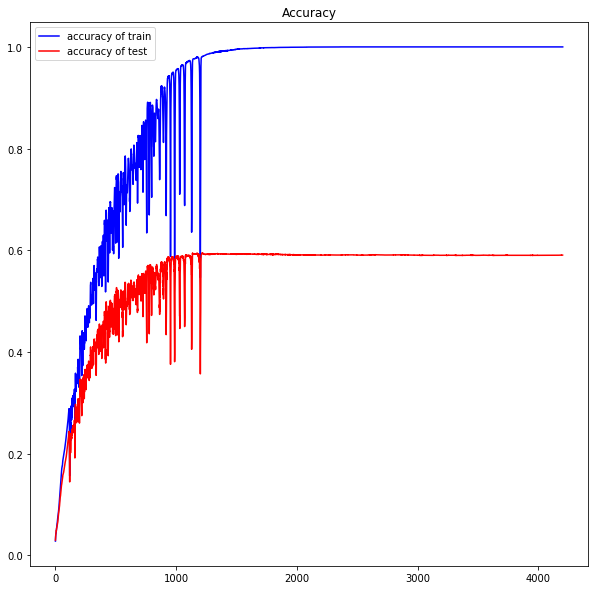

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
# plt.plot(px,py,label="loss")
plt.title("Accuracy")
plt.plot(t1,'-b',label="accuracy of train")
plt.plot(t2,'-r',label="accuracy of test")
plt.legend()
plt.show()

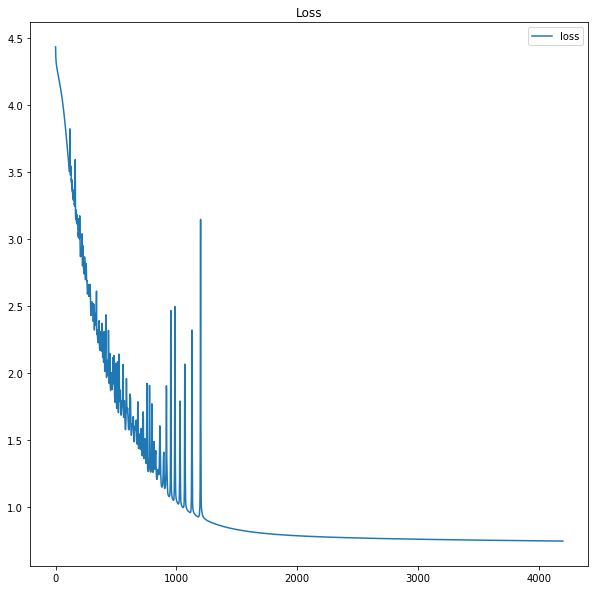

In [30]:
plt.figure(figsize=(10,10))
plt.title("Loss")
plt.plot(px,py,label="loss")
plt.legend()
plt.show()